In [1]:
import pickle 
import pandas   as pd
import numpy    as np

from sklearn                 import  preprocessing
from sklearn                 import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.linear_model    import LogisticRegression, LogisticRegressionCV
from sklearn.pipeline        import make_pipeline

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt 

In [2]:

##### Import of tables into dataframes
data = pd.read_pickle('./import/20221112_table_feature_matrix.pkl')
target = pd.read_pickle('./import/20221119_table_target.pkl')


In [5]:
#Séparation des échantillons d'entrainement et de test en 80%-20%
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 123)

In [6]:
print('Regression Logistic')
clf= LogisticRegressionCV(cv=5, scoring='roc_auc', n_jobs=-1)
clf.fit(X_train, y_train)


Regression Logistic sans normalisation


In [7]:
## Évaluation du modèle de classification
y_pred_train=clf.predict(X_train)

# Matrice de confusion 
pd.crosstab(y_train, y_pred_train>=0.5, normalize=True)

col_0,False,True
gravGrp_2_34,,
0,0.476989,0.099611
1,0.175016,0.248384


In [27]:
## Évaluation du modèle de classification
y_pred_test =clf.predict(X_test)

# Matrice de confusion 
pd.crosstab(y_test, y_pred_test>=0.5, normalize=True,  rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,False,True
Classe réelle,,
0,0.476783,0.100203
1,0.175757,0.247258


In [9]:
# Performance criteria
print(classification_report(y_train, y_pred_train>=0.5))
print(classification_report(y_test,  y_pred_test>=0.5))

              precision    recall  f1-score   support

           0       0.73      0.83      0.78    385885
           1       0.71      0.59      0.64    283357

    accuracy                           0.73    669242
   macro avg       0.72      0.71      0.71    669242
weighted avg       0.72      0.73      0.72    669242

              precision    recall  f1-score   support

           0       0.73      0.83      0.78     96536
           1       0.71      0.58      0.64     70775

    accuracy                           0.72    167311
   macro avg       0.72      0.71      0.71    167311
weighted avg       0.72      0.72      0.72    167311



In [10]:
probs = clf.predict_proba(X_test)

y_preds = np.where(probs[:,1]>0.4,1,0)

cm = pd.crosstab(y_test, y_preds, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm

Classe prédite,0,1
Classe réelle,,
0,68962,27574
1,21753,49022


In [11]:
#AUC Train
roc_train=roc_auc_score(y_train, y_pred_train)

#AUC Test
roc_test=roc_auc_score(y_test, y_pred_test)

print('AUC Train:%0.5f' %roc_train)
print('AUC Test: %0.5f' %roc_test)


AUC Train:0.70694
AUC Test: 0.70542


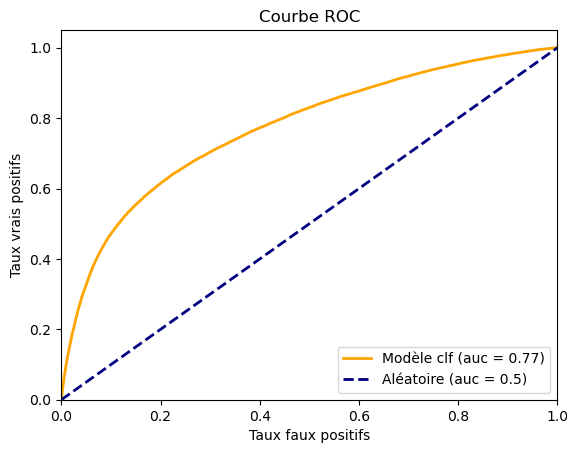

In [12]:
#courbe ROC pour evaluer la performance du modèle
from sklearn.metrics import roc_curve, auc

fpr, tpr, seuils = roc_curve(y_test, probs[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='orange', lw=2, label='Modèle clf (auc = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aléatoire (auc = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux faux positifs')
plt.ylabel('Taux vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show();

In [13]:
#LR avec Normalisation des données
scaler=preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)

clf_sc= LogisticRegressionCV(cv=10, scoring='roc_auc', n_jobs=-1)
clf_sc.fit(X_train_scaled, y_train)
print('Regression Logistic avec normalisation')

Regression Logistic avec normalisation


In [14]:
## Évaluation du modèle de classification
y_pred_train_scaled=clf.predict(X_train_scaled)

# Matrice de confusion 
pd.crosstab(y_train, y_pred_train_scaled>=0.5, normalize=True)

c:\Users\possa\miniforge3\envs\datasc01\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(


col_0,False,True
gravGrp_2_34,,
0,0.379434,0.197166
1,0.115897,0.307503


In [15]:
X_test_scaled = scaler.fit_transform(X_test)
## Évaluation du modèle de classification
y_pred_test_scaled =clf.predict(X_test_scaled)

# Matrice de confusion 
pd.crosstab(y_test, y_pred_test_scaled>=0.5, normalize=True)

c:\Users\possa\miniforge3\envs\datasc01\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(


col_0,False,True
gravGrp_2_34,,
0,0.379252,0.197734
1,0.116436,0.306579


In [26]:
# Performance criteria
print('----------------------   Critères de Performance: T R A I N  ------------------------------')
print(classification_report(y_train, y_pred_train_scaled>=0.5))
print('----------------------   Critères de Performance: T E S T  --------------------------------')
print(classification_report(y_test,  y_pred_test_scaled>=0.5))

print("Nous pouvons dire que le modèle utilisé est performant puisque les résultats sur l'échantillon de Test diffèrent peu de ceux réalisé sur celui de l'entrainement. " )

----------------------   Critères de Performance: T R A I N  ------------------------------
              precision    recall  f1-score   support

           0       0.77      0.66      0.71    385885
           1       0.61      0.73      0.66    283357

    accuracy                           0.69    669242
   macro avg       0.69      0.69      0.69    669242
weighted avg       0.70      0.69      0.69    669242

----------------------   Critères de Performance: T E S T  --------------------------------
              precision    recall  f1-score   support

           0       0.77      0.66      0.71     96536
           1       0.61      0.72      0.66     70775

    accuracy                           0.69    167311
   macro avg       0.69      0.69      0.68    167311
weighted avg       0.70      0.69      0.69    167311

Nous pouvons dire que le modèle utilisé est performant puisque les résultats sur l'échantillon de Test diffèrent peu de ceux réalisé sur celui de l'entrainement. 

In [17]:
#AUC Train
roc_train_scaled=roc_auc_score(y_train, y_pred_train_scaled)

#AUC Test
roc_test_scaled =roc_auc_score(y_test, y_pred_test_scaled)

print('AUC Train normalisé: %0.5f' %roc_train)
print('AUC Test  normalisé: %0.5f' %roc_test)


AUC Train normalisé: 0.70694
AUC Test  normalisé: 0.70542


c:\Users\possa\miniforge3\envs\datasc01\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(


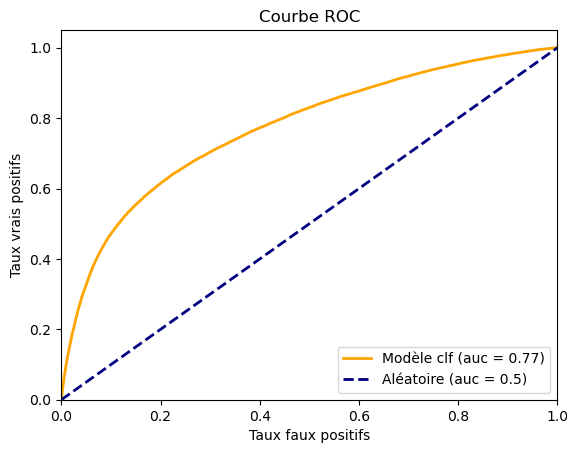

In [18]:
#courbe ROC pour evaluer la performance du modèle
from sklearn.metrics import roc_curve, auc

fpr, tpr, seuils = roc_curve(y_test, probs[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)

probs = clf.predict_proba(X_test_scaled)
y_preds = np.where(probs[:,1]>0.4,1,0)

cm = pd.crosstab(y_test, y_preds, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm

plt.plot(fpr, tpr, color='orange', lw=2, label='Modèle clf (auc = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aléatoire (auc = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux faux positifs')
plt.ylabel('Taux vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show();